# Underwater Vehicle Tracking Simulation

This notebook simulates a multi-camera system tracking an underwater vehicle in a water tank using Kalman filters.

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from filterpy.kalman import KalmanFilter
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

## 1. Define the Water Tank Environment

In [111]:
class WaterTank:
    def __init__(self, length=1, width=1, height=0.5):
        self.length = length
        self.width = width
        self.height = height
        
    def plot_tank(self, ax):
        # Plot tank boundaries
        x = [0, self.length, self.length, 0, 0]
        y = [0, 0, self.width, self.width, 0]
        z = [0, 0, 0, 0, 0]
        ax.plot(x, y, z, 'b-')
        
        # Plot top surface
        x = [0, self.length, self.length, 0, 0]
        y = [0, 0, self.width, self.width, 0]
        z = [self.height, self.height, self.height, self.height, self.height]
        ax.plot(x, y, z, 'b-')
        
        # Plot vertical edges
        for i in range(4):
            ax.plot([x[i], x[i]], [y[i], y[i]], [0, self.height], 'b-')

## 2. Define the Underwater Vehicle

In [112]:
class UnderwaterVehicle:
    def __init__(self, initial_position, initial_velocity):
        self.position = np.array(initial_position)
        self.velocity = np.array(initial_velocity)
        self.trajectory = [self.position.copy()]
        
    def update(self, dt):
        # Simple motion model with some random movement
        self.position += self.velocity * dt
        self.velocity += np.random.normal(0, 0.01, 3)  # Add some random noise
        self.trajectory.append(self.position.copy())
        
    def plot_vehicle(self, ax):
        ax.scatter(self.position[0], self.position[1], self.position[2], 
                  color='red', s=100, label='Vehicle')
        
        # Plot trajectory
        trajectory = np.array(self.trajectory)
        ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 
                'r--', alpha=0.5, label='Trajectory')

## 3. Define the Camera System

World position $\vec{w} = [x, y, z]^T$ represents a point in 3D space

Camera position $\vec{c} = [x, y, z]^T$ represents the position of the camera in the world

Camera orientation $\vec{o} = [\theta, \phi, \psi]^T$ represents the orientation of the camera in the world

Camera plane $\vec{p} = [u, v]^T$ represents a pixel in the camera plane






In [113]:
class Camera:
    def __init__(self, position, orientation, field_of_view = np.pi/4, focal_length = 1, resolution = (100, 100)):
        self.position = np.array(position)
        self.orientation = np.array(orientation)
        self.field_of_view = field_of_view
        self.focal_length = focal_length
        self.resolution = np.array(resolution)
    
    def world2camera(self, world_position):
        pass
    
    def plot_camera(self, ax):
        ax.scatter(self.position[0], self.position[1], self.position[2], 
                  color='green', s=100, label='Camera')
        # Plot camera orientation
        ax.quiver(self.position[0], self.position[1], self.position[2],
                 self.orientation[0], self.orientation[1], self.orientation[2],
                 color='green', length=0.1)

## 4. Implement Kalman Filter

In [114]:
def create_kalman_filter():
    kf = KalmanFilter(dim_x=6, dim_z=3)  # 6 states (position and velocity), 3 measurements
    
    # State transition matrix
    dt = 0.1
    kf.F = np.array([
        [1, 0, 0, dt, 0, 0],
        [0, 1, 0, 0, dt, 0],
        [0, 0, 1, 0, 0, dt],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]
    ])
    
    # Measurement matrix
    kf.H = np.array([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0]
    ])
    
    # Measurement noise
    kf.R = np.eye(3) * 0.1
    
    # Process noise
    kf.Q = np.eye(6) * 0.1
    
    return kf

## 5. Run Simulation

In [115]:
# Initialize environment
tank = WaterTank()
vehicle = UnderwaterVehicle(initial_position=[0.5, 0.5, 0.25], initial_velocity=[0.005, 0.005, 0.005])

# Initialize cameras
cameras = [
    Camera(position=[0.25, 0.25, -0.25], orientation=[0, 0, 1]),
    Camera(position=[0.25, 0.75, -0.25], orientation=[0, 0, 1]),
    Camera(position=[0.75, 0.25, -0.25], orientation=[0, 0, 1]),
    Camera(position=[0.75, 0.75, -0.25], orientation=[0, 0, 1])
]

# Initialize Kalman filter
kf = create_kalman_filter()
kf.x = np.array([1, 1, 1, 0.1, 0.1, 0.1])  # Initial state

# Simulation parameters
dt = 0.1
num_steps = 100

# Storage for results
true_positions = []
estimated_positions = []

# Run simulation
for _ in range(num_steps):
    # Update vehicle position
    vehicle.update(dt)
    true_positions.append(vehicle.position.copy())
    
    # Get observations from all cameras
    # observations = []
    # for camera in cameras:
    #     obs = camera.observe(vehicle.position)
    #     observations.append(obs)
    
    # Average observations
    # avg_observation = np.mean(observations, axis=0)
    
    # Update Kalman filter
    # kf.predict()
    # kf.update(avg_observation)
    
    # Store estimated position
    # estimated_positions.append(kf.x[:3])

# Convert to numpy arrays
true_positions = np.array(true_positions)
estimated_positions = np.array(estimated_positions)

## 6. Visualize Results

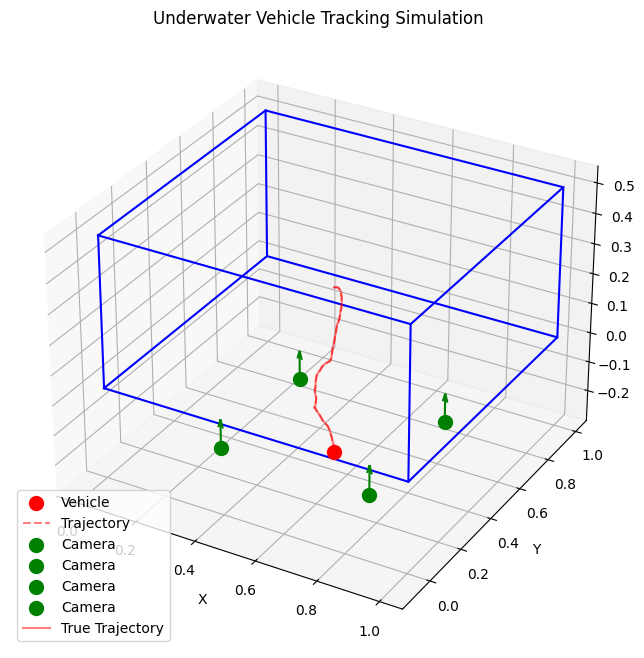

In [116]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot tank
tank.plot_tank(ax)

# Plot vehicle and trajectory
vehicle.plot_vehicle(ax)

# Plot cameras
for camera in cameras:
    camera.plot_camera(ax)

# Plot estimated trajectory
# ax.plot(estimated_positions[:, 0], estimated_positions[:, 1], estimated_positions[:, 2], 
#         'g--', alpha=0.5, label='Estimated Trajectory')

# Plot true trajectory
ax.plot(true_positions[:, 0], true_positions[:, 1], true_positions[:, 2], 
        'r-', alpha=0.5, label='True Trajectory')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Underwater Vehicle Tracking Simulation')
plt.show()

## 7. Calculate Tracking Error

In [117]:
# Calculate tracking error
errors = np.linalg.norm(true_positions - estimated_positions, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.xlabel('Time Step')
plt.ylabel('Tracking Error (m)')
plt.title('Tracking Error Over Time')
plt.grid(True)
plt.show()

ValueError: operands could not be broadcast together with shapes (100,3) (0,) 